In [2]:
#DATA ---> DATA CLEANING-->TRAINING DATA -->MODEL TESTING-->MODEL DEVELOPMNET
                        #TEST DATA
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
import pandas_datareader.data as web
from pandas import Series, DataFrame
##
sns.set()
sns.set.figsize=(200,10)
%matplotlib inline 

In [3]:
# 3 Types of regression:
# linear regression 
# Ridge Regression
# Lasso regression

In [4]:
#Load data
data = pd.read_csv("Uber.csv")



In [5]:
data.corr()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,1.000000,-0.604096,-0.637337,-0.584541,-0.627871,-0.627871,-0.366486
Open,-0.604096,1.000000,0.986696,0.988022,0.973708,0.973708,-0.004131
High,-0.637337,0.986696,1.000000,0.984697,0.986919,0.986919,0.082038
Low,-0.584541,0.988022,0.984697,1.000000,0.988376,0.988376,-0.034135
Close,-0.627871,0.973708,0.986919,0.988376,1.000000,1.000000,0.007186
Adj Close,-0.627871,0.973708,0.986919,0.988376,1.000000,1.000000,0.007186
Volume,-0.366486,-0.004131,0.082038,-0.034135,0.007186,0.007186,1.000000


## Graphing Part ##


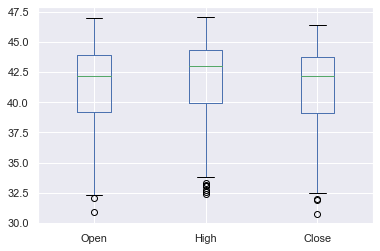

In [6]:

data.boxplot(column=["Open","High","Close"])
sns.set.figsize=(200,10)


In [7]:
close_rm=data["Close"]
rm =close_rm.rolling(window=5).mean()

import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))


[]

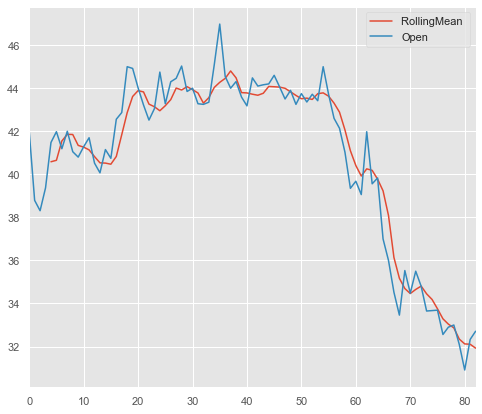

In [396]:
from matplotlib import style
rm.plot(label="RollingMean ")
data["Open"].plot(Label="Uber")
style.use('ggplot')

plt.legend()
plt.plot()

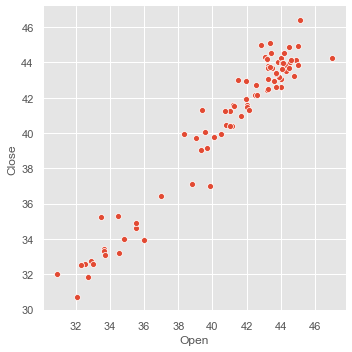

In [9]:
sns.relplot(data=data, x="Open", y="Close")

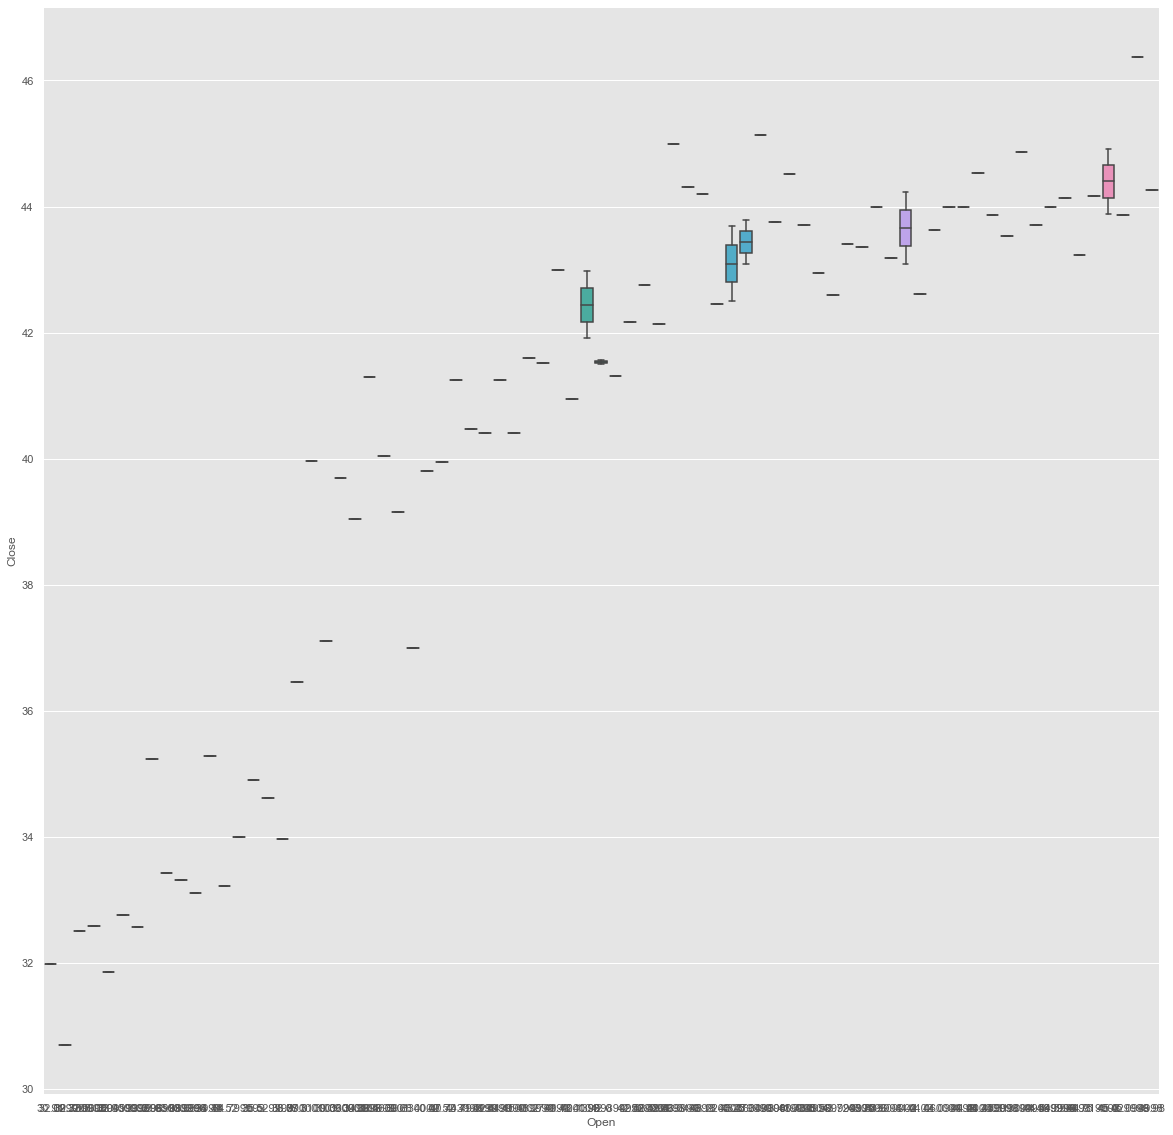

In [10]:
plt.figure(figsize=(20,20))
sns.boxplot(data=data, x="Open", y="Close")

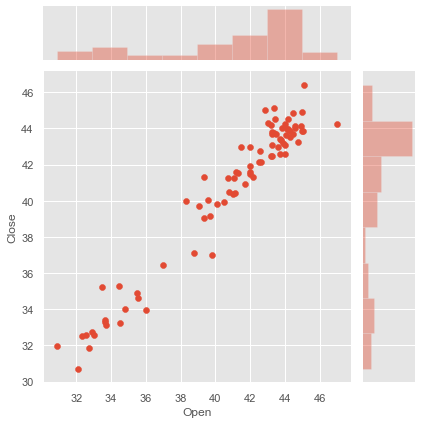

In [11]:
sns.jointplot(x="Open", y="Close", data=data);

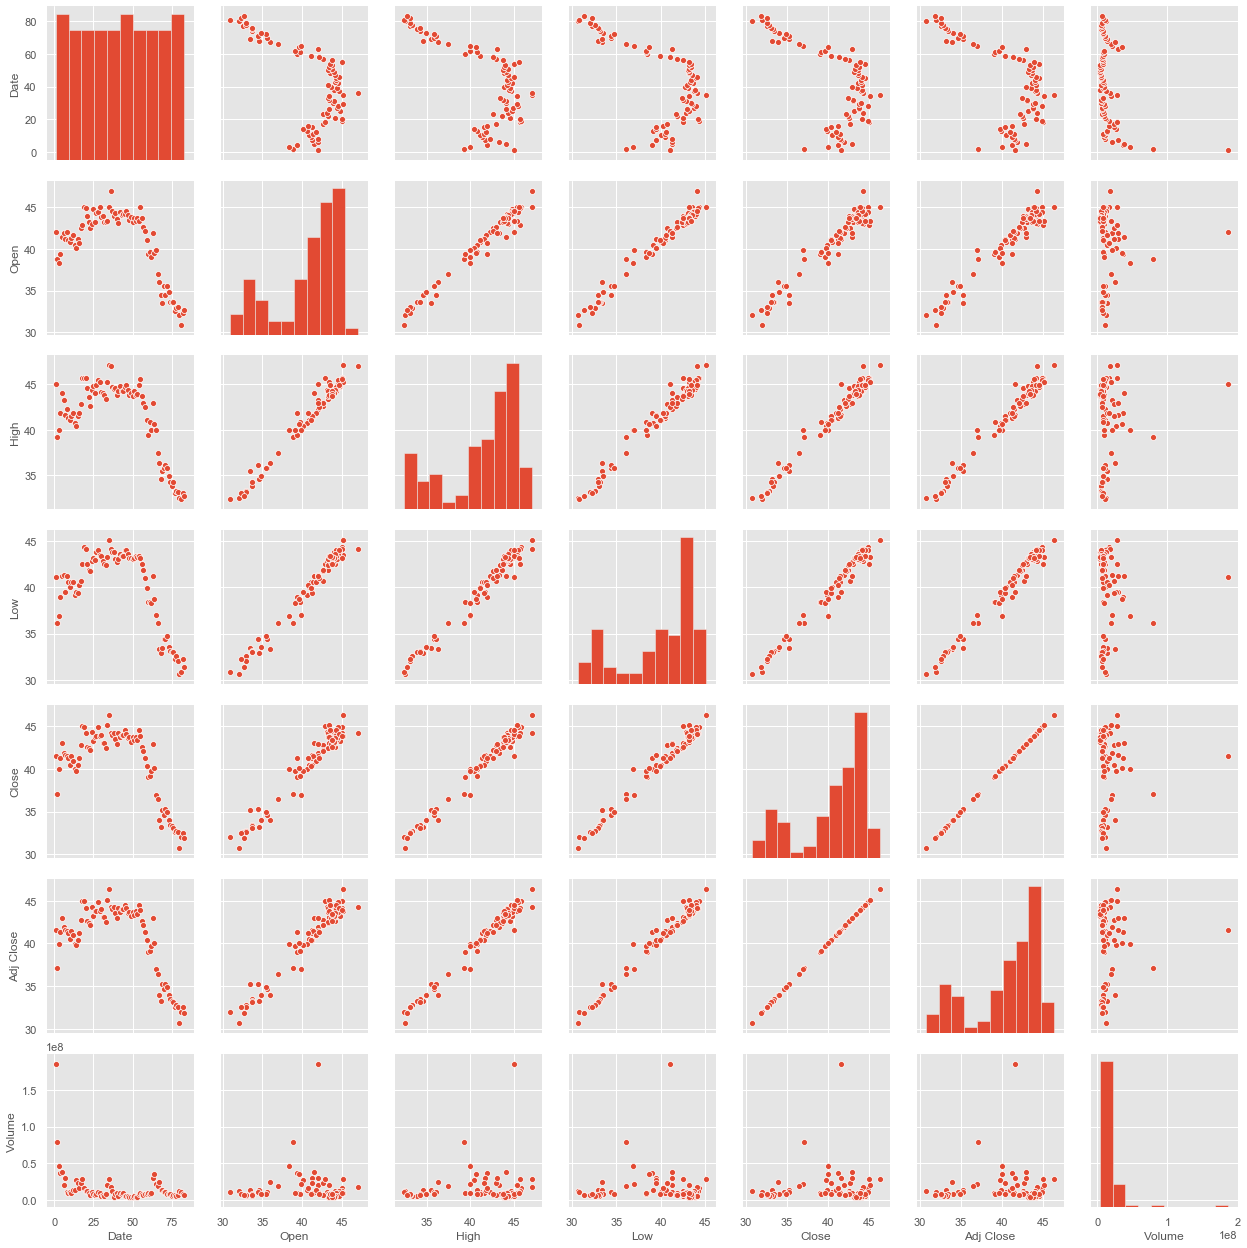

In [12]:
sns.pairplot(data)

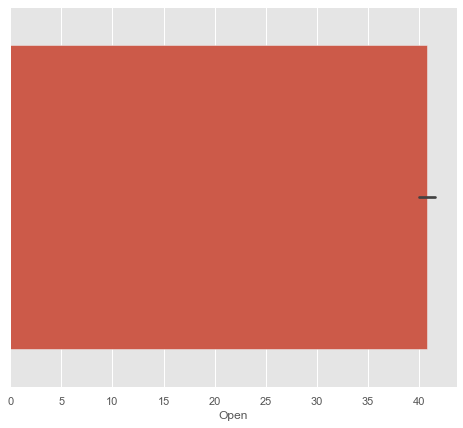

In [13]:
sns.barplot(data["Open"])

# Ridge regression 

In [14]:
from sklearn.linear_model import Ridge,Lasso


In [15]:
da=np.reshape(data["Close"],-1, 1)
df = pd.DataFrame(data=da)
Y=np.reshape(df,newshape=(-1,1))


In [16]:
pf=np.reshape(data["Date"],-1,1)
vf = pd.DataFrame(data=pf)
X=np.reshape(vf,newshape=(-1,1))

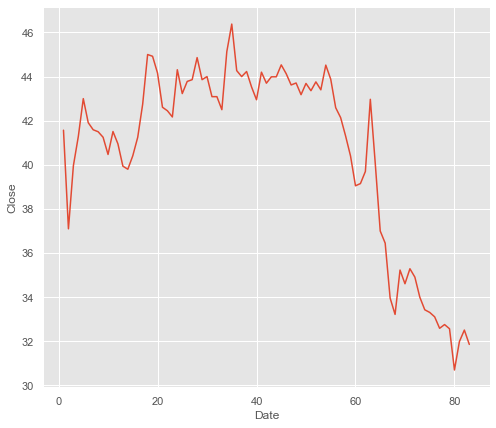

In [17]:
sns.lineplot(x="Date",y="Close", data=data)

In [18]:
cl=Ridge(alpha=4)
cl.fit(X,Y)

Ridge(alpha=4, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [19]:
Ridge.score(cl,X,Y)

0.39422255679013407

In [20]:
cl.intercept_,cl.coef_

(array([45.17002399]), array([[-0.10899655]]))

In [21]:
y=cl.coef_*1+cl.intercept_

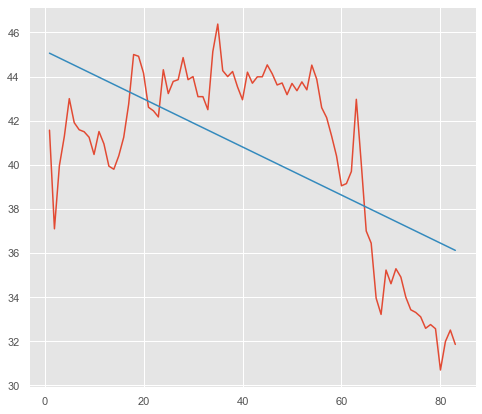

In [22]:
plt.plot(X,Y)
plt.plot(X,cl.coef_* X + cl.intercept_)


In [23]:
cl.score(X,Y)
##Final Score ##

0.39422255679013407

A2

For Ridge Regression the score is: 0.39422254220744374

# The Lasso

In [31]:
clf = linear_model.Lasso(alpha=4)
clf.fit(X,Y)

print(clf.intercept_,clf.coef_)
gY=clf.coef_*X+clf.intercept_

[44.87772542] [-0.10203706]


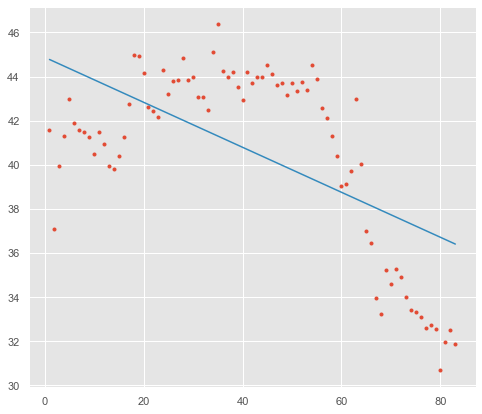

In [196]:
plt.plot(X,Y,".")
plt.plot(X,gY)


In [26]:
clf.score(X,Y)

0.3926113975003138

In [27]:
cl.score(X,Y)-clf.score(X,Y)

0.001611159289820252

# Polynomial Regression

In [55]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures

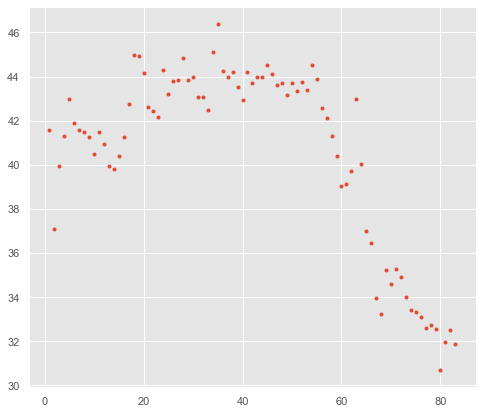

In [368]:
plt.plot(X,Y,".")

In [386]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)


In [387]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y)
y_pred = lin_reg_2.predict(X_poly)


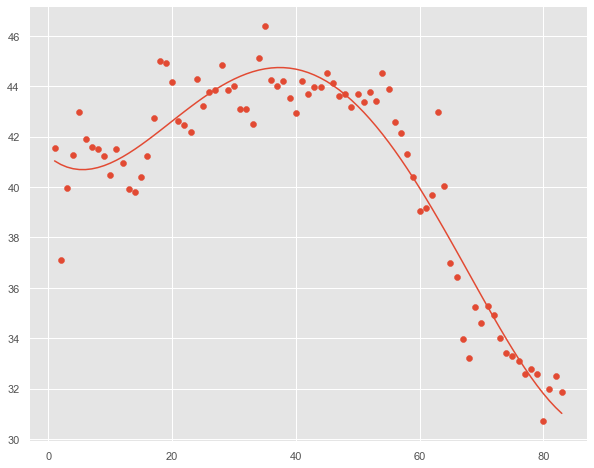

In [388]:
plt.figure(figsize=(10,8));
plt.scatter(X, Y);
plt.plot(X, y_pred);


In [393]:


from sklearn.metrics import r2_score

print(r2_score(Y, y_pred))


0.9053859287719905


The R2 score came out to be: 0.9053859287719905 not bad better then Ridge and lasson 